# Prophet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read csv
df = pd.read_csv('listuu.csv')
#df = df.tail(110)
df.head()

,yymmdd,uu
0,2019-09-01,142093
1,2019-09-02,134372
2,2019-09-03,137703
3,2019-09-04,130252
4,2019-09-05,126291


In [2]:
df.shape

(122, 2)

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


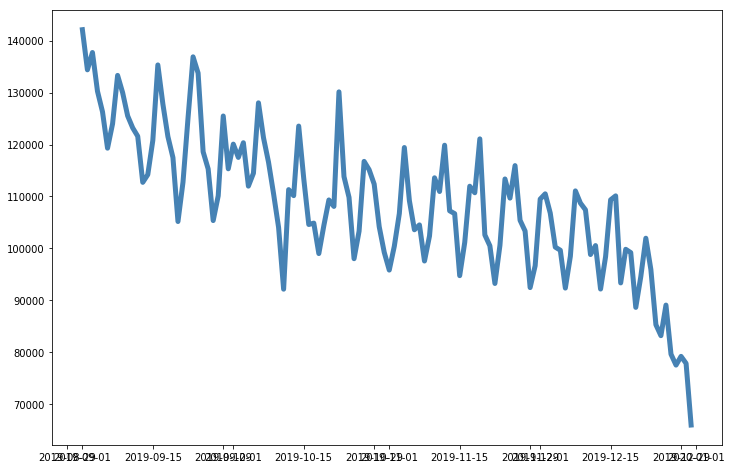

In [3]:
df['yymmdd'] = pd.to_datetime(df['yymmdd'])
df = df.set_index('yymmdd')

# トラフィック数を可視化
plt.rcParams['figure.figsize'] = 12, 8
plt.plot(df.index, df["uu"], linewidth=5, color="steelblue")

In [4]:
df = df[["uu"]]
df.head()

,uu
yymmdd,
2019-09-01,142093
2019-09-02,134372
2019-09-03,137703
2019-09-04,130252
2019-09-05,126291


In [5]:
df["cap"] = df["uu"].max()

In [57]:
from fbprophet import Prophet

df_input = df.reset_index().rename(columns={'yymmdd':'ds', 'uu':'y'})
model = Prophet(growth='logistic', 
                n_changepoints=30,
                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=False, 
                changepoint_prior_scale = 0.95,
                mcmc_samples=500)

model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(df_input)

/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [58]:
future = model.make_future_dataframe(periods=45, freq="d")
future["cap"] = df["uu"].max()
forecast = model.predict(future)

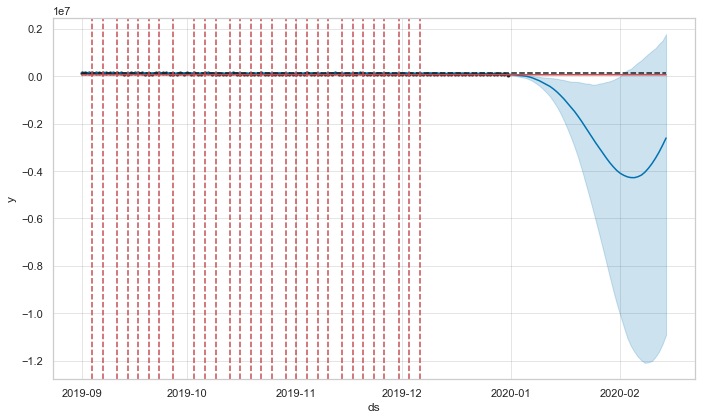

In [59]:
# Python
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [88]:
model.changepoints.head(10)

4    2019-09-05
8    2019-09-09
12   2019-09-13
15   2019-09-16
19   2019-09-20
23   2019-09-24
27   2019-09-28
31   2019-10-02
35   2019-10-06
38   2019-10-09
Name: ds, dtype: datetime64[ns]

In [89]:
np.abs(model.params['delta'].ravel()).max()

6.69687791853372e-09

In [42]:
df_changepoints.head()

,ds,y,cap,delta,abs
3,2019-09-04,130252,142093,-2.900522e-08,29.005224
6,2019-09-07,123992,142093,6.981277e-09,6.981277
10,2019-09-11,123205,142093,1.889193e-07,188.919338
13,2019-09-14,114211,142093,9.139291e-04,913929.057363
16,2019-09-17,127787,142093,-5.210428e-09,5.210428


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



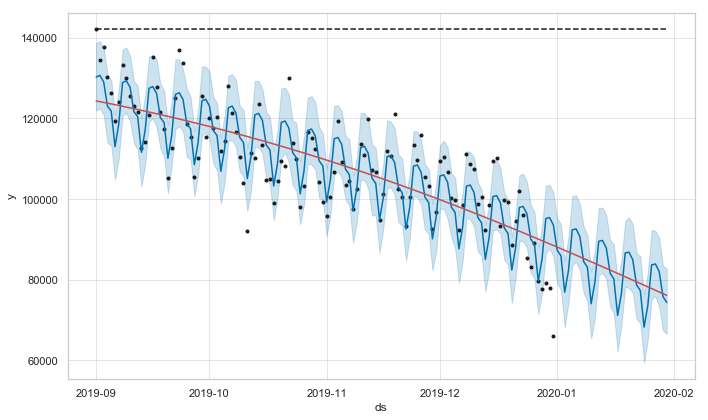

In [84]:
from fbprophet.plot import add_changepoints_to_plot
model = Prophet(growth='logistic', daily_seasonality=False)
model.add_seasonality(name='weekly', period=7, fourier_order=5)
model.fit(df_input)

future = model.make_future_dataframe(periods=30)
future["cap"] = df["uu"].max()
forecast = model.predict(future)

fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



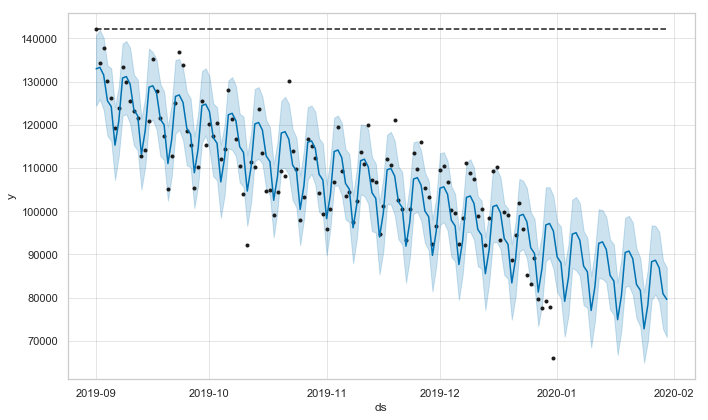

In [85]:
# Python
m = Prophet(changepoints=['2019-09-30'])
forecast = m.fit(df_input).predict(future)
fig = m.plot(forecast)